# Basic EDA

## 1. Import the libraries

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## 2. Import the dataset

In [317]:
org_train_data = pd.read_csv('train.csv')
org_test_data = pd.read_csv('test.csv')

## 3. Checking the diff columns and removing unnecessary columns

In [318]:
org_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID isn't useful in making the predictions so removing the column

In [319]:
train_data = org_train_data.drop('Loan_ID',axis=1)
test_data = org_test_data.drop('Loan_ID',axis=1)

In [320]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [321]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Checking the proportion of target value

In [322]:
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [323]:
y_train = train_data['Loan_Status']
train_data = train_data.drop('Loan_Status', axis=1)

## Cosolidated Data

In [324]:
con_data = train_data.append(test_data)

In [325]:
con_data.shape

(981, 11)

## Describing the Data

In [377]:
description = con_data.describe()
description

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## 4. Checking for missing values

In [388]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int8   
 1   Married            614 non-null    int8   
 2   Dependents         614 non-null    int8   
 3   Education          614 non-null    int8   
 4   Self_Employed      614 non-null    int8   
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int8   
dtypes: float64(4), int64(1), int8(6)
memory usage: 27.7 KB


In [389]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


### Checking the missing values proportion

In [390]:
train_data.isnull().sum()*100/len(train_data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [391]:
test_data.isnull().sum()*100/len(test_data)

Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [392]:
train_data.shape

(614, 11)

In [393]:
test_data.shape

(367, 11)

In [395]:
con_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [396]:
con_data.shape

(981, 11)

### Imputing the missing values

#### Imputing categorical missing values

In [337]:
from statistics import mode
def imputeCategoricalMissingValues(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column].fillna(mode(data[column].dropna()), inplace = True)

In [397]:
imputeCategoricalMissingValues(con_data)

In [339]:
def uniqueColumns(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            print(data[column].unique())

In [398]:
#Checking for the unique values in categorical features
uniqueColumns(con_data)

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


####  Imputing numeric missing values 

In [399]:
def doesColumnHasOutliers(description, column):
    IQR = description[column].loc['75%'] - description[column].loc['25%']
    lowerRange = description[column].loc['25%'] - (1.5*IQR)
    upperRange = description[column].loc['75%'] + (1.5*IQR)
    if(lowerRange<description[column].loc['min'] or upperRange>description[column].loc['max']):
        return True
    return False

In [400]:
from statistics import median, mean
def imputeNumericMissingValues(data):
    description = data.describe()
    for column in data.columns:
        if data[column].dtype != 'object':
            if(doesColumnHasOutliers(description, column)):
                data[column].fillna(median(data[column].dropna()), inplace = True)
            else:
                data[column].fillna(mean(data[column].dropna()), inplace = True)

In [401]:
imputeNumericMissingValues(con_data)

## 5. Converting categorical values

In [402]:
#Not required as it is a decision tree

In [403]:
def convertObjectToNumeric(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = pd.Categorical(data[column]).codes

In [404]:
convertObjectToNumeric(con_data)

In [405]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int8   
 1   Married            981 non-null    int8   
 2   Dependents         981 non-null    int8   
 3   Education          981 non-null    int8   
 4   Self_Employed      981 non-null    int8   
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int8   
dtypes: float64(4), int64(1), int8(6)
memory usage: 51.7 KB


## 6. Duplicates

In [406]:
train_data.duplicated().sum()

0

No duplicates found in the train dataset

# Univariate and Bivariate Analysis

# 1. Univariate Analysis - To check outliers

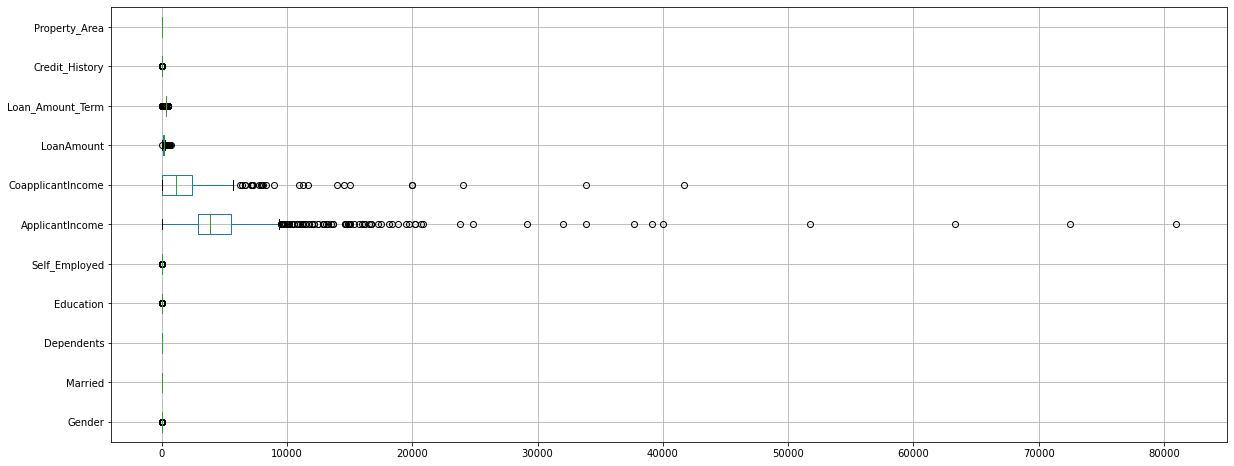

In [407]:
plt.figure(figsize=(20,8))
con_data[list(train_data.columns)].boxplot(vert=0)

In [408]:
def columnsBoxplot(data):
    plt.figure(figsize=(16,8))
    count = 1
    for column in data.columns:
        if data[column].dtype != 'object':
            plt.subplot(7,2,count)
            count+=1
            sns.boxplot(data[column])

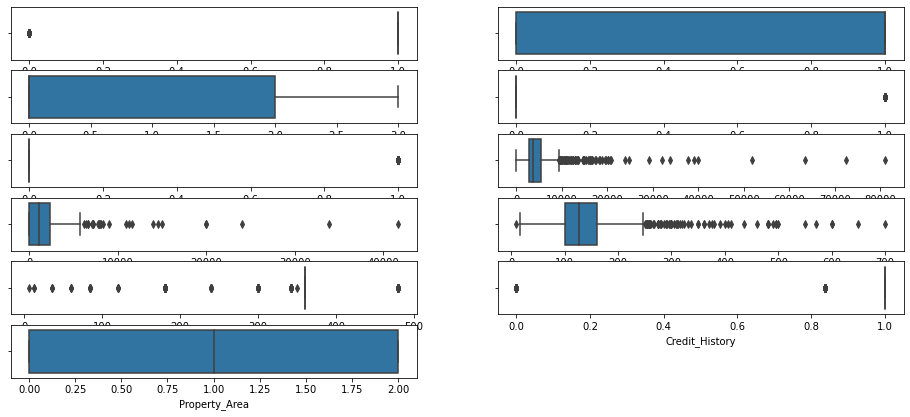

In [409]:
columnsBoxplot(con_data)

In [353]:
# Not treating any outliers as of now

## 2. Bivariate Analysis - To check Multi Collinearity

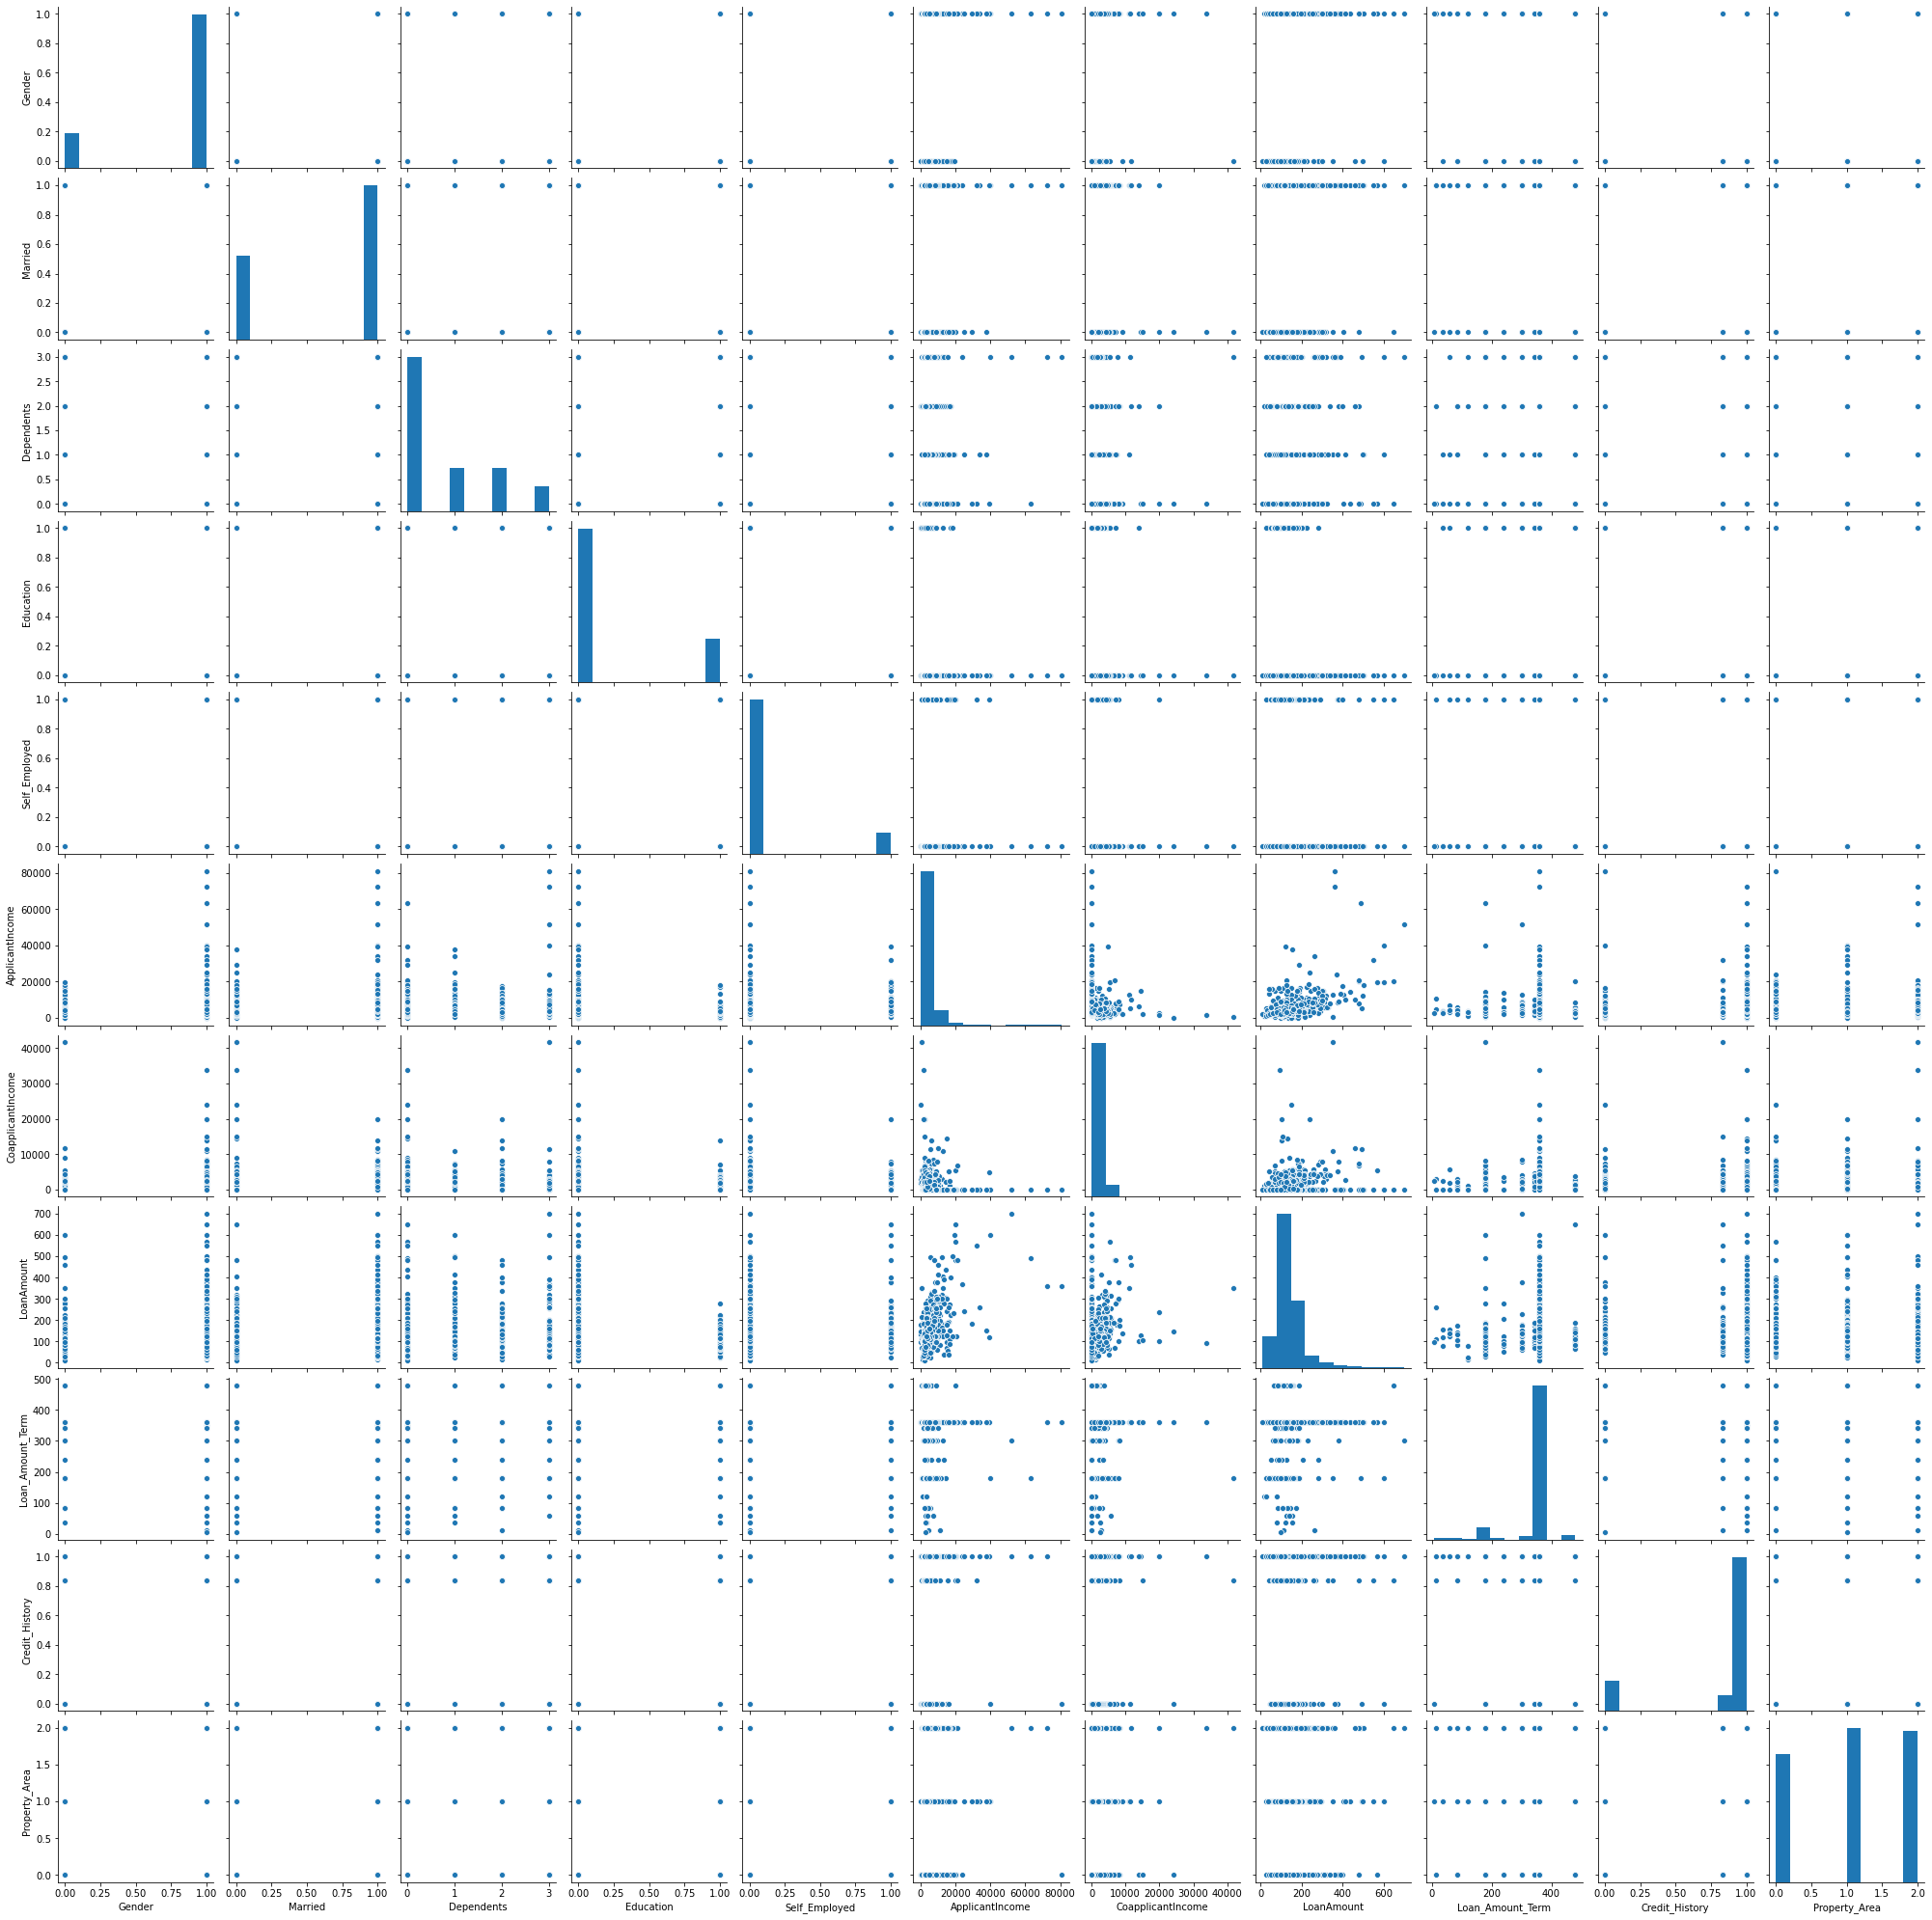

In [410]:
# Pair Plot
sns.pairplot(con_data)

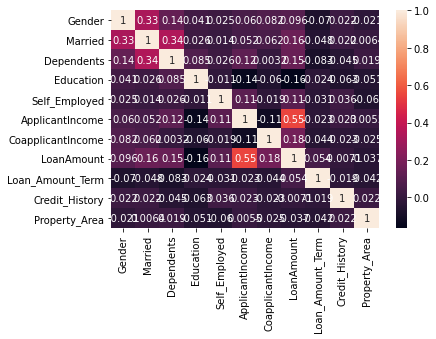

In [411]:
#Heat Map

sns.heatmap(con_data.corr(),annot=True)

In [356]:
# There isn't any multi collinearity between the features

# Steps to split the data

## 1. Scaling

In [357]:
# Scaling isn't required for decision trees

## 2. Splitting 

In [358]:
# Splitting isn't required in this case, as it was already separated

In [414]:
#x_train = train_data.drop('Loan_Status', axis=1)
#y_train = train_data['Loan_Status']
#x_test = test_data
x_train = con_data.iloc[:train_data.shape[0],:]
x_test = con_data.iloc[train_data.shape[0]:,:]

In [416]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [418]:
x_train.shape

(614, 11)

In [419]:
y_train.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [421]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.00000,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.00000,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.00000,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,0.83592,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.00000,2


In [424]:
x_test.shape

(367, 11)

# Model

## 1. Training the model

### Plain model

In [463]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train, y_train)

DecisionTreeClassifier()

In [475]:
from sklearn import tree
plain_loan_decision_tree = open("E:\Courses\Hackathons\Loan Predicition - AV\plain_loan_decision_tree.dot",'w')
dot_data = tree.export_graphviz(dtc1, out_file = plain_loan_decision_tree, feature_names = list(x_train), class_names = list(y_train))

plain_loan_decision_tree.close()

print (pd.DataFrame(dtc1.feature_importances_, columns = ["Imp"], index = x_train.columns))

                        Imp
Gender             0.020882
Married            0.013169
Dependents         0.063318
Education          0.020592
Self_Employed      0.006459
ApplicantIncome    0.214738
CoapplicantIncome  0.098344
LoanAmount         0.204595
Loan_Amount_Term   0.026788
Credit_History     0.299978
Property_Area      0.031138


In [476]:
list(x_train)

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [471]:
ytrain_predict = dtc1.predict(x_train)

In [427]:
confusion_matrix(ytrain_predict, y_train)

array([[192,   0],
       [  0, 422]], dtype=int64)

In [428]:
print(classification_report(ytrain_predict, y_train))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00       192
           Y       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [496]:
def prepareSubmissionFile(filename, model, x_test, org_test_data, index, target):
    ytest_predict = pd.DataFrame(model.predict(x_test))
    result = pd.concat([pd.DataFrame(org_test_data[index]), ytest_predict],axis=1)
    result.to_csv(filename, header=[index,target], index=False)
    return result

In [497]:
result = prepareSubmissionFile('submission_2211_1.csv', dtc1, x_test, org_test_data, 'Loan_ID','Loan_Status')
result

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,N


### Tuned model

In [539]:
def bestParamGrid(x_train, y_train):
    paramGrid = {
                 'criterion':['gini','entropy'],
                 'max_depth':[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600],
                 'min_samples_leaf':[10,15,20,25,30,35,40],
                 'min_samples_split':[30,35,40,45,50]
                }
    dtc2 = DecisionTreeClassifier()
    grid_search = GridSearchCV(estimator = dtc2, param_grid = paramGrid, cv=10)
    grid_search.fit(x_train, y_train)
    grid_search.best_params_
    return grid_search.best_estimator_

In [540]:
best_grid = bestParamGrid(x_train, y_train)

In [541]:
best_grid

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=30)

In [542]:
y_predict = best_grid.predict(x_train)
print(classification_report(y_predict, y_train))

              precision    recall  f1-score   support

           N       0.43      0.92      0.58        89
           Y       0.98      0.79      0.88       525

    accuracy                           0.81       614
   macro avg       0.71      0.86      0.73       614
weighted avg       0.90      0.81      0.83       614



In [543]:
result = prepareSubmissionFile('submission_2211_4.csv', best_grid, x_test, org_test_data, 'Loan_ID','Loan_Status')
result

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
